In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as pt
import pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
pd.options.display.max_columns=100

In [2]:
dft = pd.read_csv('./train.csv')

In [3]:
dft.columns.values

array(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default'],
      dtype=object)

In [4]:
dft.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [5]:
dft['PERFORM_CNS.SCORE.DESCRIPTION'].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [6]:
df1 = dft[dft['PERFORM_CNS.SCORE'] == 0]
df2 = dft[dft['PERFORM_CNS.SCORE'] != 0]
df1.to_csv('./TrainNoHistory.csv',index = None)
df2.to_csv('./TrainHistory.csv',index = None)

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

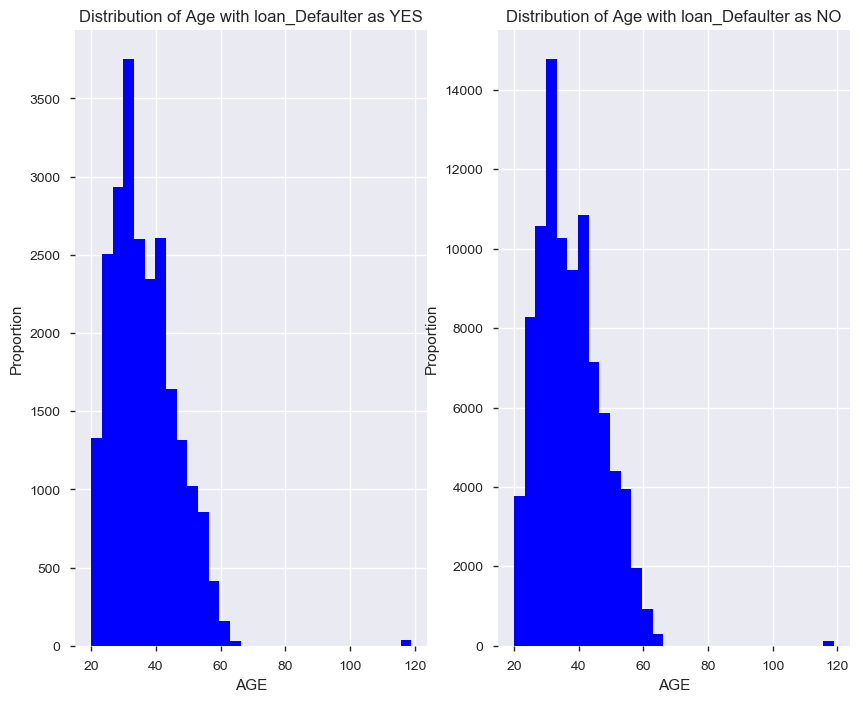

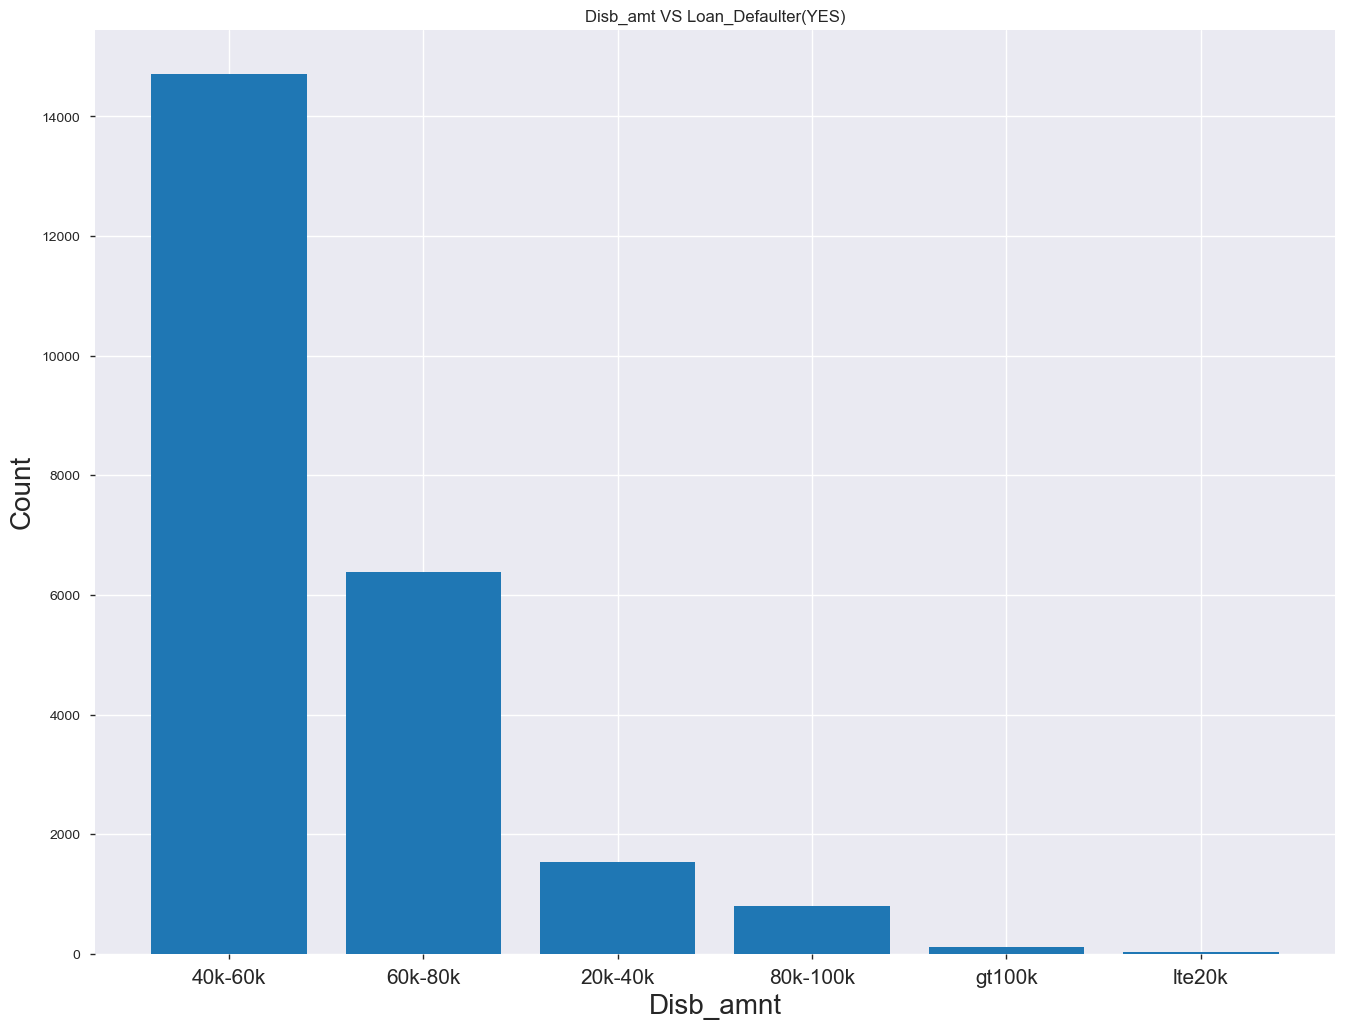

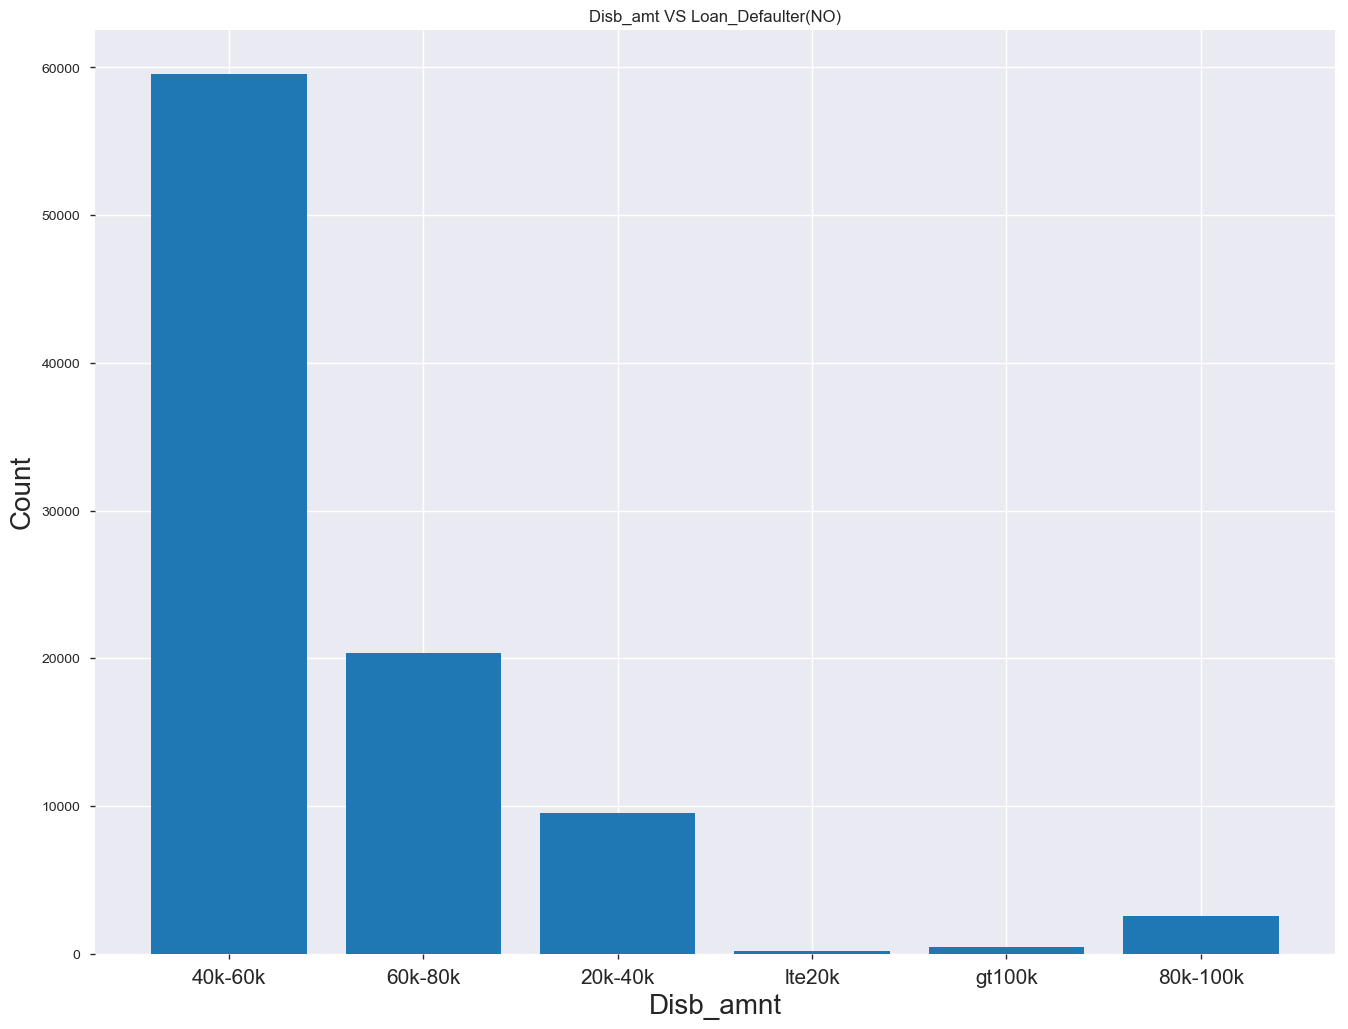

c:\program files (x86)\python36-32\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:648: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


checking imbalanced:
loan_default
0    91758
1    23486
Name: loan_default, dtype: int64


c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

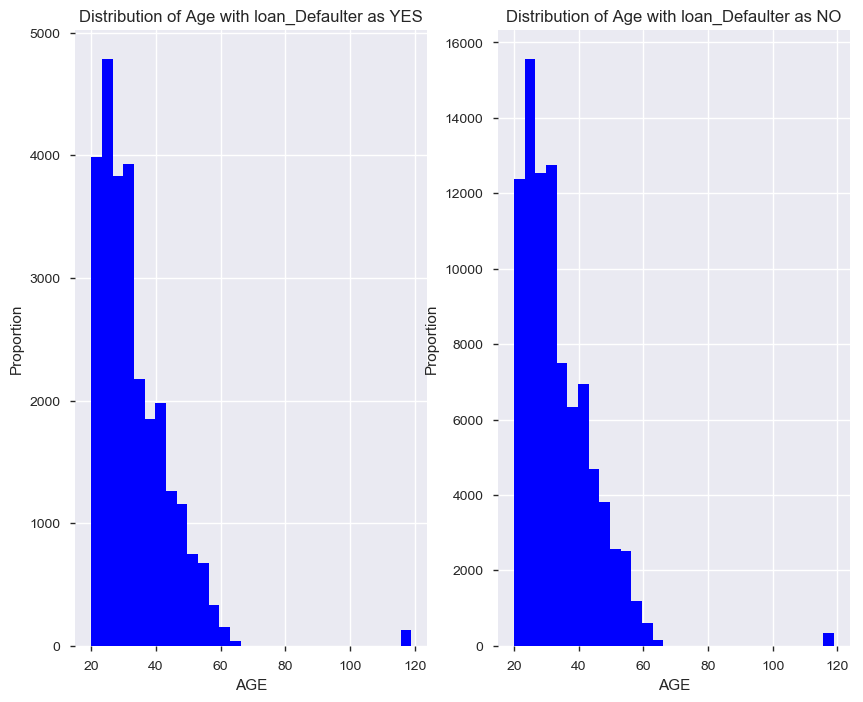

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:407: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:423: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


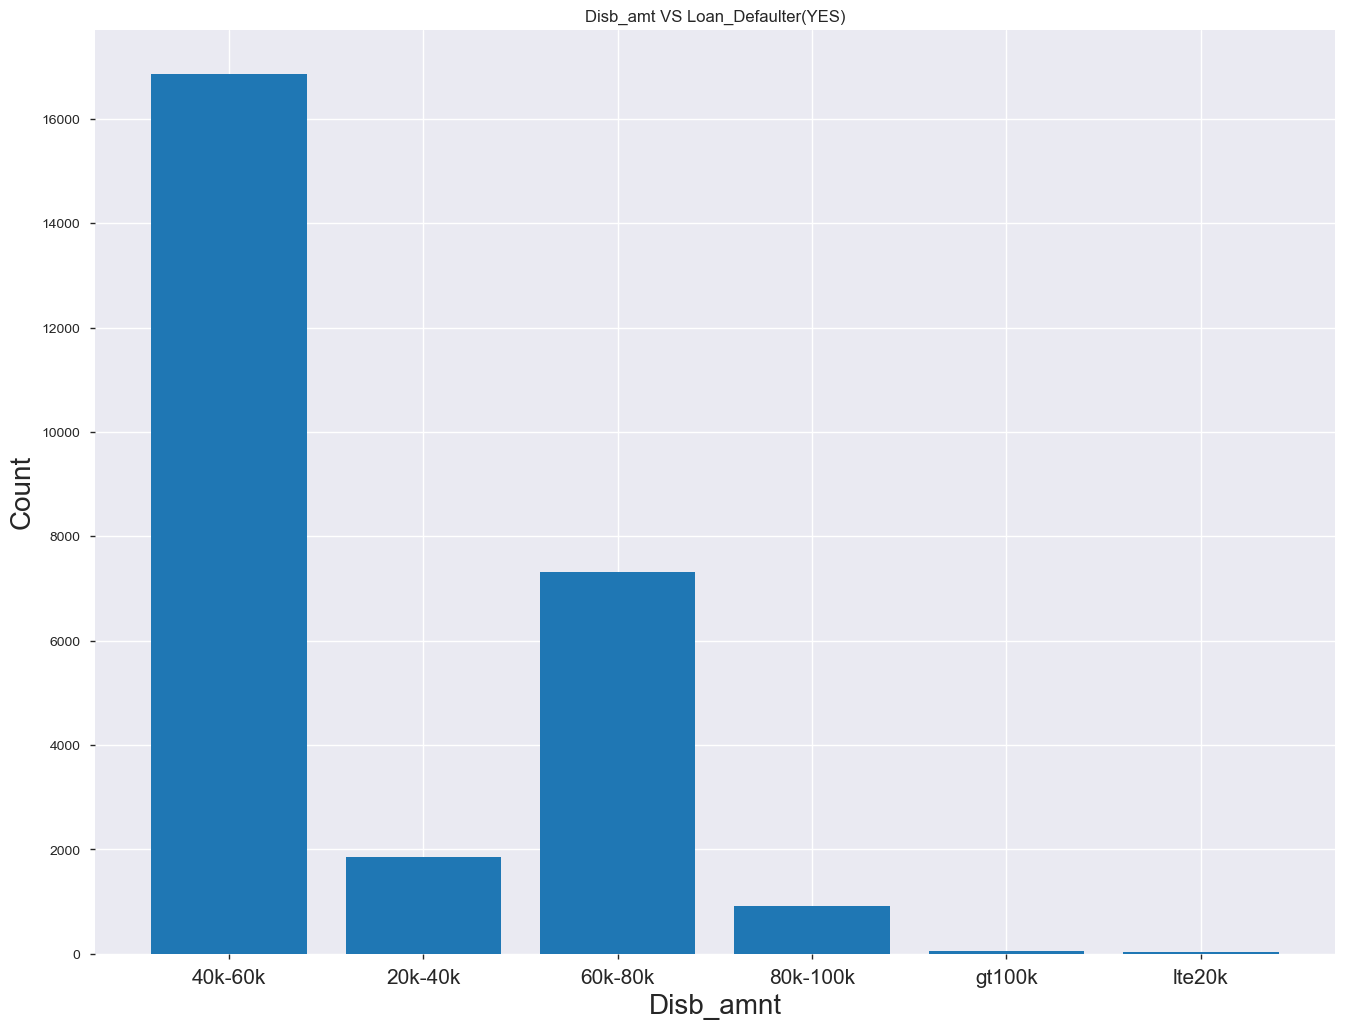

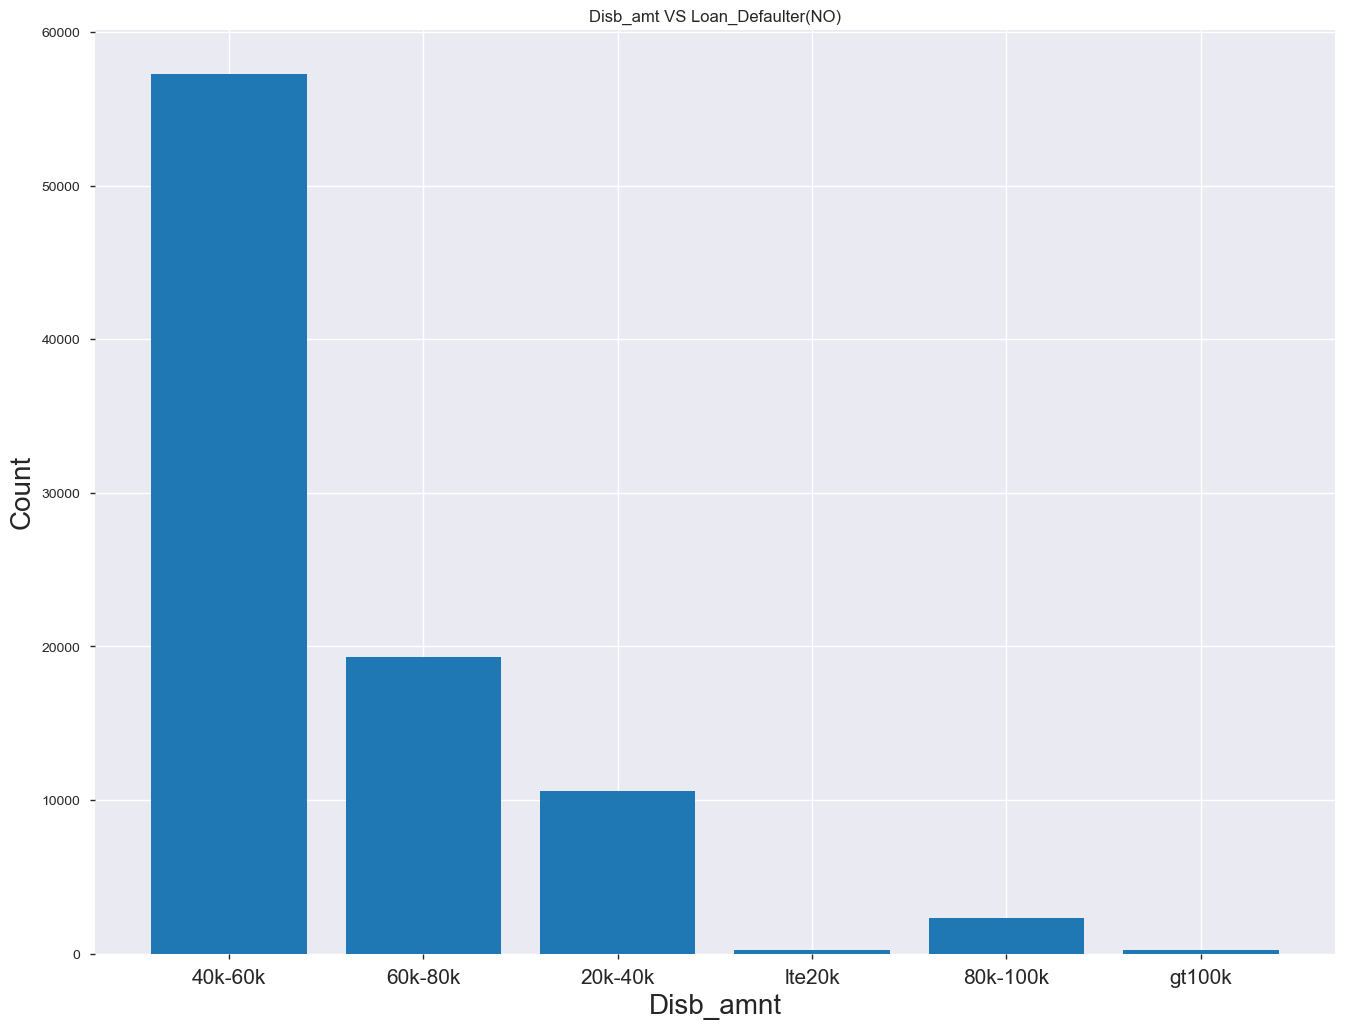

c:\program files (x86)\python36-32\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:648: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


checking imbalanced:
loan_default
0    32213
1    13703
Name: loan_default, dtype: int64


In [7]:
def PreProceesingData(filetype,filename):
    h_df = pd.read_csv('./'+filename)
    pd.set_option('display.max_columns', 500)
    h_prof = pandas_profiling.ProfileReport(h_df)
    if filetype == 1:
        h_prof.to_file(outputfile="TrainHistoryProfileoutput.html")
    else:
        h_prof.to_file(outputfile="TrainNoHistoryProfileoutput.html")
    
    rejected_variables = h_prof.get_rejected_variables()
    
    if filetype == 1:
        h_rej_var = ['PRI.DISBURSED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'SEC.SANCTIONED.AMOUNT','MobileNo_Avl_Flag']
    else:
        h_rej_var = ['SEC.DISBURSED.AMOUNT', 'SEC.SANCTIONED.AMOUNT','MobileNo_Avl_Flag','PERFORM_CNS.SCORE.DESCRIPTION',
                       'PERFORM_CNS.SCORE','PRI.ACTIVE.ACCTS','PRI.CURRENT.BALANCE','PRI.DISBURSED.AMOUNT','PRI.NO.OF.ACCTS',
                       'PRI.OVERDUE.ACCTS','PRI.SANCTIONED.AMOUNT','PRIMARY.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']
    
    con_var = [c for c in h_df.columns if c not in h_rej_var ]
    h_df2 = h_df[con_var]
    h_df2['Employment.Type'] = h_df2['Employment.Type'].fillna('NotEmployed')
    bid_df = h_df2.groupby(['branch_id','loan_default'])['loan_default'].size().unstack().reset_index()
    bid_df.columns = ['branch_id', 'ld0', 'ld1']
    bid_df['bid_ld_ratio'] = bid_df.apply(lambda x:x['ld1']/(x['ld1']+x['ld0']),axis=1)
    bid_df['bid_ld_ratio'] = bid_df['bid_ld_ratio'].apply(lambda x:round(x,2))
    bid_df.describe()
    
    if filetype == 1:
        def bidld_ratio_trans(rt):
            if rt <= (0.18):
                return 'lte[0.18R]'
            elif 0.18 < rt <= (0.21):
                return '0.18R-0.21R'
            elif 0.21 < rt <= 0.23:
                return '0.21R-0.23R'
            else:
                return 'gt[0.23R]'
    
        bid_df['bidld_ratio_conv'] = bid_df['bid_ld_ratio'].apply(lambda x:bidld_ratio_trans(x))
        bid_df.to_csv('./Trainbranchid_h.csv',index=None)
    else:
        def bidld_ratio_trans(rt):
            if rt <= (0.20):
                return 'lte[0.20R]'
            elif 0.20 < rt <= (0.22):
                return '0.20R-0.22R'
            elif 0.22 < rt <= 0.27:
                return '0.22R-0.27R'
            else:
                return 'gt[0.27R]'
    
        bid_df['bidld_ratio_conv'] = bid_df['bid_ld_ratio'].apply(lambda x:bidld_ratio_trans(x))
        bid_df.to_csv('./TrainNobranchid_h.csv',index=None)
    
    sid_df = h_df2.groupby(['supplier_id','loan_default'])['loan_default'].size().unstack().reset_index()
    sid_df = sid_df.fillna(0)
    sid_df.columns = ['supplier_id', 'ld0', 'ld1']
    sid_df['sid_ld_ratio'] = sid_df.apply(lambda x:x['ld1']/(x['ld1']+x['ld0']),axis=1)
    sid_df['sid_ld_ratio'] = sid_df['sid_ld_ratio'].apply(lambda x:round(x,2))
    sid_df.describe()
    
    def sidld_ratio_trans(rt):
        if rt <= 0.12:
            return 'lte[0.12R]'
        elif 0.12 < rt <= 0.20:
            return '0.11R-0.20R'
        elif 0.20 < rt <= 0.30:
            return '0.20R-0.30R'
        else:
            return 'gt[0.30R]'
    sid_df['sidld_ratio_conv'] = sid_df['sid_ld_ratio'].apply(lambda x:sidld_ratio_trans(x))
    
    if filetype == 1:
        sid_df.to_csv('./Trainsupplierid_h.csv',index=None)
    else:
        sid_df.to_csv('./TrainNosupplierid_h.csv',index=None)
        
    mid_df = h_df2.groupby(['manufacturer_id','loan_default'])['loan_default'].size().unstack().reset_index()
    mid_df = mid_df.fillna(0)
    mid_df.columns = ['manufacturer_id', 'ld0', 'ld1']
    mid_df['mid_ld_ratio'] = mid_df.apply(lambda x:x['ld1']/(x['ld1']+x['ld0']),axis=1)
    mid_df['mid_ld_ratio'] = mid_df['mid_ld_ratio'].apply(lambda x:round(x,3))
    mid_df.describe()
    
    if filetype  == 1:
        def midld_ratio_trans(rt):
            if rt <= 0.182:
                return 'lte[0.182R]'
            elif 0.182 < rt <= 0.207:
                return '0.182R-0.207R'
            elif 0.207 < rt <= 0.217:
                return '0.207R-0.217R'
            else:
                return 'gt[0.217R]'
        mid_df['midld_ratio_conv'] = mid_df['mid_ld_ratio'].apply(lambda x:midld_ratio_trans(x))    
        mid_df.to_csv('./Trainmanfacturerid_h.csv',index=None)
    else:
        def midld_ratio_trans(rt):
            if rt <= 0.22:
                return 'lte[0.22R]'
            elif 0.22 < rt <= 0.23:
                return '0.22R-0.23R'
            elif 0.23 < rt <= 0.24:
                return '0.23R-0.24R'
            else:
                return 'gt[0.24R]'
        mid_df['midld_ratio_conv'] = mid_df['mid_ld_ratio'].apply(lambda x:midld_ratio_trans(x))
        mid_df.to_csv('./TrainNomanfacturerid_h.csv',index=None)
    
    pinid_df = h_df2.groupby(['Current_pincode_ID','loan_default'])['loan_default'].size().unstack().reset_index()
    pinid_df = pinid_df.fillna(0)
    pinid_df.columns = ['Current_pincode_ID', 'ld0', 'ld1']
    pinid_df['pinid_ld_ratio'] = pinid_df.apply(lambda x:x['ld1']/(x['ld1']+x['ld0']),axis=1)
    pinid_df['pinid_ld_ratio'] = pinid_df['pinid_ld_ratio'].apply(lambda x:round(x,2))
    pinid_df.describe()
    
    if filetype  == 1:
        def pinld_ratio_trans(rt):
            if rt <= 0.17:
                return 'lte[0.17R]'
            elif 0.17 < rt <= 0.31:
                return '0.17R-0.31R'
            else:
                return 'gt[0.31R]'
        pinid_df['pinld_ratio_conv'] = pinid_df['pinid_ld_ratio'].apply(lambda x:pinld_ratio_trans(x))
        pinid_df.to_csv('./Trainpincodeid_h.csv',index=None)
    else:
        def pinld_ratio_trans(rt):
            if rt <= 0.19:
                return 'lte[0.19R]'
            elif 0.19 < rt <= 0.33:
                return '0.19R-0.33R'
            else:
                return 'gt[0.33R]'
        pinid_df['pinld_ratio_conv'] = pinid_df['pinid_ld_ratio'].apply(lambda x:pinld_ratio_trans(x))
        pinid_df.to_csv('./TrainNopincodeid_h.csv',index=None)
    
    stateid_df = h_df2.groupby(['State_ID','loan_default'])['loan_default'].size().unstack().reset_index()
    stateid_df = stateid_df.fillna(0)
    stateid_df.columns = ['State_ID', 'ld0', 'ld1']
    stateid_df['stateid_ld_ratio'] = stateid_df.apply(lambda x:x['ld1']/(x['ld1']+x['ld0']),axis=1)
    stateid_df['stateid_ld_ratio'] = stateid_df['stateid_ld_ratio'].apply(lambda x:round(x,3))
    stateid_df.describe()
    
    if filetype  == 1:
        def stateidld_ratio_trans(rt):
            if rt <= 0.184:
                return 'lte[0.184R]'
            elif 0.184 < rt <= 0.195:
                return '0.184R-0.195R'
            elif 0.195 < rt <= 0.206:
                return '0.195R-0.206R'
            else:
                return 'gt[0.206R]'
        stateid_df['stateidld_ratio_conv'] = stateid_df['stateid_ld_ratio'].apply(lambda x:stateidld_ratio_trans(x))
        stateid_df.to_csv('./Trainstateid_h.csv',index=None)
    else:
        def stateidld_ratio_trans(rt):
            if rt <= 0.20:
                return 'lte[0.20R]'
            elif 0.20 < rt <= 0.21:
                return '0.20R-0.21R'
            elif 0.21 < rt <= 0.25:
                return '0.21R-0.25R'
            else:
                return 'gt[0.25R]'
        stateid_df['stateidld_ratio_conv'] = stateid_df['stateid_ld_ratio'].apply(lambda x:stateidld_ratio_trans(x))
        stateid_df.to_csv('./TrainNostateid_h.csv',index=None)
    
    empid_df = h_df2.groupby(['Employee_code_ID','loan_default'])['loan_default'].size().unstack().reset_index()
    empid_df = empid_df.fillna(0)
    empid_df.columns = ['Employee_code_ID', 'ld0', 'ld1']
    empid_df['empid_ld_ratio'] = empid_df.apply(lambda x:x['ld1']/(x['ld1']+x['ld0']),axis=1)
    empid_df['empid_ld_ratio'] = empid_df['empid_ld_ratio'].apply(lambda x:round(x,2))
    empid_df.describe()
    
    def empidld_ratio_trans(rt):
        if rt <= 0.12:
            return 'lte[0.12R]'
        elif 0.12 < rt <= 0.20:
            return '0.12R-0.20R'
        elif 0.20 < rt <= 0.29:
            return '0.20R-0.29R'
        else:
            return 'gt[0.29R]'
    empid_df['empidld_ratio_conv'] = empid_df['empid_ld_ratio'].apply(lambda x:empidld_ratio_trans(x))
    if filetype  == 1:
        empid_df.to_csv('./Trainempid_h.csv',index=None)
    else:
        empid_df.to_csv('./TrainNoempid_h.csv',index=None)
    
    def IsproofSubmitted(A,P,V,D,Pa):
        if (A+P+D+V+Pa > 0):
            return 1
        else:
            return 0
    
    h_df2['proof_submitted'] = list(map(IsproofSubmitted,h_df2['Aadhar_flag'],h_df2['PAN_flag'],h_df2['VoterID_flag'],h_df2['Driving_flag'],h_df2['Passport_flag']))
    h_df2[['Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag','proof_submitted']].head(10)
    
    def accAgeConvert(age):
        value = age.split('yrs')
        year = value[0]
        value1 = value[1].split('mon')
        months = value1[0]
        return ((int(year)*12)+int(months))

    h_df2['AvgAccountAge'] = h_df2['AVERAGE.ACCT.AGE'].apply(lambda k : accAgeConvert(k))
    h_df2['CreditHistAge'] = h_df2['CREDIT.HISTORY.LENGTH'].apply(lambda k : accAgeConvert(k))
    
    import datetime
    h_df2['DOB'] = h_df2['Date.of.Birth'].apply(lambda k:k.split('-')[0]+'-'+k.split('-')[1]+'-19'+k.split('-')[2])
    if filetype == 1:
        h_df2['DOB'] = h_df2['DOB'].apply(lambda k:datetime.datetime.strptime(k, '%d-%m-%Y'))
    else:
        h_df2['DOB']=h_df2['DOB'].apply(lambda x:pd.to_datetime(x, format='%d-%m-%Y', errors='coerce'))
    
    from datetime import date
    Today = date.today()
    def Age_cal(dob):
        return (Today.year - dob.year)

    h_df2['age'] = h_df2['DOB'].apply(lambda k:Age_cal(k))
    h_df2[['Date.of.Birth','DOB','age']].head(10)
    
    if filetype == 1:
        h_df2['PRI_left_bal']= h_df2.apply(lambda x:x['PRI.CURRENT.BALANCE']-x['PRIMARY.INSTAL.AMT'] if ((x['PRI.CURRENT.BALANCE'] > 0) and (x['PRI.CURRENT.BALANCE'] > x['PRIMARY.INSTAL.AMT']))  else 0 ,axis=1)
        h_df2[['PRI.CURRENT.BALANCE','PRIMARY.INSTAL.AMT','PRI_left_bal']].head()
        pd.value_counts(h_df2[h_df2['PRI.CURRENT.BALANCE'] < 0]['loan_default'])
        PriOvrDue_df = h_df2.groupby(['PRI.OVERDUE.ACCTS','loan_default'])['loan_default'].size().unstack().reset_index()
        PriOvrDue_df = PriOvrDue_df.fillna(0)
        PriOvrDue_df.columns = ['PriOvrDue', 'ld0', 'ld1']
        PriOvrDue_df['PriOvrDue_ld_ratio'] = PriOvrDue_df.apply(lambda x:x['ld1']/(x['ld1']+x['ld0']),axis=1)
        PriOvrDue_df['PriOvrDue_ld_ratio'] = PriOvrDue_df['PriOvrDue_ld_ratio'].apply(lambda x:round(x,2))
        PriOvrDue_df.to_csv('./TrainPriOvrDue_h.csv',index=None)
        PriOvrDue_df.describe()
    
        def PriOvrDueld_ratio_trans(rt):
            if rt <= 0.17:
                return 'lte[0.17R]'
            elif 0.17 < rt <= 0.21:
                return '0.17R-0.21R'
            elif 0.21 < rt <= 0.29:
                return '0.21R-0.29R'
            else:
                return 'gt[0.29R]'
        
        PriOvrDue_df['PriOvrDue_ld_ratio_conv'] = PriOvrDue_df['PriOvrDue_ld_ratio'].apply(lambda x:PriOvrDueld_ratio_trans(x))
        PriActAcnt_df = h_df2.groupby(['PRI.ACTIVE.ACCTS','loan_default'])['loan_default'].size().unstack().reset_index()
        PriActAcnt_df = PriActAcnt_df.fillna(0)
        PriActAcnt_df.columns = ['PriActAcnt', 'ld0', 'ld1']
        PriActAcnt_df['PriActAcnt_ld_ratio'] = PriActAcnt_df.apply(lambda x:x['ld1']/(x['ld1']+x['ld0']),axis=1)
        PriActAcnt_df['PriActAcnt_ld_ratio'] = PriActAcnt_df['PriActAcnt_ld_ratio'].apply(lambda x:round(x,3))
        PriActAcnt_df.to_csv('./TrainPriActAcnt_h.csv',index=None)
        PriActAcnt_df.describe()
        
        def PriActAcntld_ratio_trans(rt):
            if rt <= 0.128:
                return 'lte[0.128R]'
            elif 0.128 < rt <= 0.185:
                return '0.128R-0.185R'
            else:
                return 'gt[0.185R]'
    
        PriActAcnt_df['PriActAcnt_ld_ratio_conv'] = PriActAcnt_df['PriActAcnt_ld_ratio'].apply(lambda x:PriActAcntld_ratio_trans(x))
        PriPrevAcnt_df = h_df2.groupby(['PRI.NO.OF.ACCTS','loan_default'])['loan_default'].size().unstack().reset_index()
        PriPrevAcnt_df = PriPrevAcnt_df.fillna(0)
        PriPrevAcnt_df.columns = ['PriPrevAcnt', 'ld0', 'ld1']
        PriPrevAcnt_df['PriPrevAcnt_ld_ratio'] = PriPrevAcnt_df.apply(lambda x:x['ld1']/(x['ld1']+x['ld0']),axis=1)
        PriPrevAcnt_df['PriPrevAcnt_ld_ratio'] = PriPrevAcnt_df['PriPrevAcnt_ld_ratio'].apply(lambda x:round(x,2))
        PriPrevAcnt_df.to_csv('./TrainPriPrevAcnt_h.csv',index=None)
        PriPrevAcnt_df.describe()
    
        def PriPrevAcntld_ratio_trans(rt):
            if rt <= 0.16:
                return 'lte[0.16R]'
            elif 0.16 < rt <= 0.20:
                return '0.16R-0.20R'
            else:
                return 'gt[0.20R]'
    
        PriPrevAcnt_df['PriPrevAcnt_ld_ratio_conv'] = PriPrevAcnt_df['PriPrevAcnt_ld_ratio'].apply(lambda x:PriPrevAcntld_ratio_trans(x))
        
    SecOvrDue_df = h_df2.groupby(['SEC.OVERDUE.ACCTS','loan_default'])['loan_default'].size().unstack().reset_index()
    SecOvrDue_df = SecOvrDue_df.fillna(0)
    SecOvrDue_df.columns = ['SecOvrDue', 'ld0', 'ld1']
    SecOvrDue_df['SecOvrDue_ld_ratio'] = SecOvrDue_df.apply(lambda x:x['ld1']/(x['ld1']+x['ld0']),axis=1)
    SecOvrDue_df['SecOvrDue_ld_ratio'] = SecOvrDue_df['SecOvrDue_ld_ratio'].apply(lambda x:round(x,2))
    SecOvrDue_df.describe()
    
    if filetype  == 1:
        def SecOvrDue_ld_ratio_trans(rt):
            if rt <= 0.12:
                return 'lte[0.12R]'
            elif 0.12 < rt <= 0.20:
                return '0.12R-0.20R'
            elif 0.20 < rt <= 0.23:
                return '0.20R-0.23R'
            else:
                return 'gt[0.23R]'
    
        SecOvrDue_df['SecOvrDue_ld_ratio_conv'] = SecOvrDue_df['SecOvrDue_ld_ratio'].apply(lambda x:SecOvrDue_ld_ratio_trans(x))
        SecOvrDue_df.to_csv('./TrainSecOvrDue_h.csv',index=None)
    else:
        def SecOvrDue_ld_ratio_trans(rt):
            if rt <= 0.24:
                return 'lte[0.24R]'
            elif 0.24 < rt <= 0.28:
                return '0.24R-0.28R'
            elif 0.28 < rt <= 0.33:
                return '0.28R-0.33R'
            else:
                return 'gt[0.33R]'
        SecOvrDue_df['SecOvrDue_ld_ratio_conv'] = SecOvrDue_df['SecOvrDue_ld_ratio'].apply(lambda x:SecOvrDue_ld_ratio_trans(x))
        SecOvrDue_df.to_csv('./TrainNoSecOvrDue_h.csv',index=None)
    
    SecActAcnt_df = h_df2.groupby(['SEC.ACTIVE.ACCTS','loan_default'])['loan_default'].size().unstack().reset_index()
    SecActAcnt_df = SecActAcnt_df.fillna(0)
    SecActAcnt_df.columns = ['SecActAcnt', 'ld0', 'ld1']
    SecActAcnt_df['SecActAcnt_ld_ratio'] = SecActAcnt_df.apply(lambda x:x['ld1']/(x['ld1']+x['ld0']),axis=1)
    SecActAcnt_df['SecActAcnt_ld_ratio'] = SecActAcnt_df['SecActAcnt_ld_ratio'].apply(lambda x:round(x,2))
    SecActAcnt_df.describe()
    
    if filetype  == 1:
        def SecActAcnt_ld_ratio_trans(rt):
            if rt <= 0.15:
                return 'lte[0.15R]'
            elif 0.15 < rt <= 0.24:
                return '0.15R-0.24R'
            else:
                return 'gt[0.24R]'
    
        SecActAcnt_df['SecActAcnt_ld_ratio_conv'] = SecActAcnt_df['SecActAcnt_ld_ratio'].apply(lambda x:SecActAcnt_ld_ratio_trans(x))
        SecActAcnt_df.to_csv('./TrainSecActAcnt_h.csv',index=None)
    else:
        def SecActAcnt_ld_ratio_trans(rt):
            if rt <= 0.21:
                return 'lte[0.21R]'
            elif 0.21 < rt <= 0.26:
                return '0.21R-0.26R'
            else:
                return 'gt[0.26R]'
    
        SecActAcnt_df['SecActAcnt_ld_ratio_conv'] = SecActAcnt_df['SecActAcnt_ld_ratio'].apply(lambda x:SecActAcnt_ld_ratio_trans(x))
        SecActAcnt_df.to_csv('./TrainNoSecActAcnt_h.csv',index=None)
    
    SecPrevAcnt_df = h_df2.groupby(['SEC.NO.OF.ACCTS','loan_default'])['loan_default'].size().unstack().reset_index()
    SecPrevAcnt_df = SecPrevAcnt_df.fillna(0)
    SecPrevAcnt_df.columns = ['SecPrevAcnt', 'ld0', 'ld1']
    SecPrevAcnt_df['SecPrevAcnt_ld_ratio'] = SecPrevAcnt_df.apply(lambda x:x['ld1']/(x['ld1']+x['ld0']),axis=1)
    SecPrevAcnt_df['SecPrevAcnt_ld_ratio'] = SecPrevAcnt_df['SecPrevAcnt_ld_ratio'].apply(lambda x:round(x,2))
    SecPrevAcnt_df.describe()
    
    if filetype  == 1:
        def SecPrevAcnt_ld_ratio_trans(rt):
            if rt <= 0.15:
                return 'lte[0.15R]'
            elif 0.15 < rt <= 0.20:
                return '0.15R-0.20R'
            else:
                return 'gt[0.20R]'
    
        SecPrevAcnt_df['SecPrevAcnt_ld_ratio_conv'] = SecPrevAcnt_df['SecPrevAcnt_ld_ratio'].apply(lambda x:SecPrevAcnt_ld_ratio_trans(x))
        SecPrevAcnt_df.to_csv('./TrainSecPrevAcnt_h.csv',index=None)
    else:
        def SecPrevAcnt_ld_ratio_trans(rt):
            if rt <= 0.20:
                return 'lte[0.20R]'
            elif 0.20 < rt <= 0.40:
                return '0.20R-0.40R'
            else:
                return 'gt[0.40R]'
    
        SecPrevAcnt_df['SecPrevAcnt_ld_ratio_conv'] = SecPrevAcnt_df['SecPrevAcnt_ld_ratio'].apply(lambda x:SecPrevAcnt_ld_ratio_trans(x))
        SecPrevAcnt_df.to_csv('./TrainNoSecPrevAcnt_h.csv',index=None)
    
    h_df2['Sec_left_bal']= h_df2.apply(lambda x:x['SEC.CURRENT.BALANCE']-x['SEC.INSTAL.AMT'] if ((x['SEC.CURRENT.BALANCE'] > 0) and (x['SEC.CURRENT.BALANCE'] > x['SEC.INSTAL.AMT'] )) else 0 ,axis=1)
    
    k = []
    k1 = []
    for index,row in h_df2.iterrows():
        if row['loan_default'] == 1:
            k.append(row['age'])
        else:
            k1.append(row['age'])
    fig  = pt.figure(figsize=(10,8))
    ax = fig.add_subplot(121)
    ax.set(title="Distribution of Age with loan_Defaulter as YES",
          ylabel='Proportion', xlabel='AGE')
    ax.hist(k, color='blue', bins=30, normed=False)
    ax = fig.add_subplot(122)
    ax.set(title="Distribution of Age with loan_Defaulter as NO",
          ylabel='Proportion', xlabel='AGE')
    ax.hist(k1, color='blue', bins=30, normed=False)
    fig.savefig('./'+filename+'AgeVSloan_Def.png', bbox_inches='tight',pad_inches=0.1)
    pt.show()        

    def Age_Trans(Age):
        if Age <=25:
            return 'Young'
        elif 25<Age<45:
            return 'Middle'
        elif 45<=Age<55:
            return 'Old'
        else:
            return 'TooOld'
    h_df2['Age_conv'] = h_df2['age'].apply(lambda x:Age_Trans(x))

    def Disb_amnt_Trans(amt):
        if amt <= 20000:
            return 'lte20k'
        elif 20000< amt <=40000:
            return '20k-40k'
        elif 40000< amt <= 60000:
            return '40k-60k'
        elif 60000< amt <= 80000:
            return '60k-80k'
        elif 80000 < amt <= 100000:
            return '80k-100k'
        else:
            return 'gt100k'
    
    h_df2['Disb_amnt_conv'] = h_df2['disbursed_amount'].apply(lambda x:Disb_amnt_Trans(x))

    import collections as c
    k = []
    k1 = []
    for index,row in h_df2.iterrows():
        if row['loan_default'] == 1:
            k.append(row['Disb_amnt_conv'])
        else:
            k1.append(row['Disb_amnt_conv'])
        
    counter = c.Counter(k)
    x1 = counter.keys()
    x2 = counter.values()

    index = np.arange(len(x1))
    fig, ax = pt.subplots(figsize=(16,12))
    ax.bar(index, x2)
    pt.xlabel('Disb_amnt', fontsize=20)
    pt.ylabel('Count', fontsize=20)
    pt.xticks(index, x1, fontsize=15)
    pt.title('Disb_amt VS Loan_Defaulter(YES)')
    fig.savefig('./'+filename+'Disb_amtVSLoan_def(Y).png', bbox_inches='tight',pad_inches=0.1)
    pt.show()

    counter = c.Counter(k1)
    x1 = counter.keys()
    x2 = counter.values()

    index = np.arange(len(x1))
    fig, ax = pt.subplots(figsize=(16,12))
    ax.bar(index, x2)
    pt.xlabel('Disb_amnt', fontsize=20)
    pt.ylabel('Count', fontsize=20)
    pt.xticks(index, x1, fontsize=15)
    pt.title('Disb_amt VS Loan_Defaulter(NO)')
    fig.savefig('./'+filename+'Disb_amtVSLoan_def(N).png', bbox_inches='tight',pad_inches=0.1)
    pt.show()

    bid_df.columns = ['bid'+c for c in bid_df.columns]
    h_df21 = pd.merge(h_df2,bid_df,left_on = 'branch_id',right_on = 'bidbranch_id')
    sid_df.columns = ['sid'+c for c in sid_df.columns]
    h_df22 = pd.merge(h_df21,sid_df,left_on = 'supplier_id',right_on = 'sidsupplier_id')
    mid_df.columns = ['mid'+c for c in mid_df.columns]
    h_df23 = pd.merge(h_df22,mid_df,left_on = 'manufacturer_id',right_on = 'midmanufacturer_id')
    pinid_df.columns = ['pinid'+c for c in pinid_df.columns]
    h_df24 = pd.merge(h_df23,pinid_df,left_on = 'Current_pincode_ID',right_on = 'pinidCurrent_pincode_ID')
    stateid_df.columns = ['stid'+c for c in stateid_df.columns]
    h_df25 = pd.merge(h_df24,stateid_df,left_on = 'State_ID',right_on = 'stidState_ID')
    empid_df.columns = ['empid'+c for c in empid_df.columns]
    h_df26 = pd.merge(h_df25,empid_df,left_on = 'Employee_code_ID',right_on = 'empidEmployee_code_ID')
    
    if filetype == 1:
        PriOvrDue_df.columns = ['Pri'+c for c in PriOvrDue_df.columns]
        h_df27 = pd.merge(h_df26,PriOvrDue_df,left_on = 'PRI.OVERDUE.ACCTS',right_on = 'PriPriOvrDue')
        PriActAcnt_df.columns = ['Pri'+c for c in PriActAcnt_df.columns]
        h_df28 = pd.merge(h_df27,PriActAcnt_df,left_on='PRI.ACTIVE.ACCTS',right_on='PriPriActAcnt')
        PriPrevAcnt_df.columns = ['Pri'+ c for c in PriPrevAcnt_df.columns]
        h_df29 = pd.merge(h_df28,PriPrevAcnt_df,left_on='PRI.NO.OF.ACCTS',right_on = 'PriPriPrevAcnt')
    
    SecOvrDue_df.columns = ['Sec'+ c for c in SecOvrDue_df.columns]
    if filetype  == 1:
        h_df30 = pd.merge(h_df29,SecOvrDue_df,left_on='SEC.OVERDUE.ACCTS',right_on = 'SecSecOvrDue')
    else:
        h_df30 = pd.merge(h_df26,SecOvrDue_df,left_on='SEC.OVERDUE.ACCTS',right_on = 'SecSecOvrDue')
    
    SecActAcnt_df.columns = ['Sec'+c for c in SecActAcnt_df.columns]
    h_df31 = pd.merge(h_df30,SecActAcnt_df,left_on = 'SEC.ACTIVE.ACCTS',right_on = 'SecSecActAcnt')
    SecPrevAcnt_df.columns = ['Sec'+c for c in SecPrevAcnt_df.columns]
    h_df32 = pd.merge(h_df31,SecPrevAcnt_df,left_on='SEC.NO.OF.ACCTS',right_on = 'SecSecPrevAcnt')
    pd.set_option('float_format', '{:.2f}'.format)
    
    if filetype == 1:
        h_df32['Pri_Current_Bal'] = h_df32['PRI.CURRENT.BALANCE'].apply(lambda x : x if x>0 else 0)
        h_df32['Pri_Current_Bal'].describe()

        def Pri_Current_Bal_Trans(amt):
            if amt <= 2402:
                return 'lte[2.4K]'
            elif 2400 < amt <= 35315:
                return '2.4K-35.3K'
            elif 35315 < amt <= 198719:
                return '35.3K-198.7K'
            else:
                return 'gt[198.7K]'
    
        h_df32['Pri_Current_Bal_Conv'] = h_df32['Pri_Current_Bal'].apply(lambda x : Pri_Current_Bal_Trans(x))
        h_df32['PRI.SANCTIONED.AMOUNT'].describe()

        def Pri_Sanctioned_Amt_Trans(amt):
            if amt <= 15000:
                return 'lte[15K]'
            elif 15000 < amt <= 63100:
                return '15K-63.1K'
            elif 63100 < amt <= 307000:
                return '63.1K-307K'
            else:
                return 'gt[307K]'
    
        h_df32['Pri_Sanctioned_Amt_Conv'] = h_df32['PRI.SANCTIONED.AMOUNT'].apply(lambda x : Pri_Sanctioned_Amt_Trans(x))
        h_df32['PRIMARY.INSTAL.AMT'].describe()

        def Pri_Inst_Amt_Trans(amt):
            if amt <= 2000:
                return 'lte[2K]'
            elif 2000 < amt <= 8400:
                return '2K-8.4K'
            else:
                return 'gt[8.4K]'
    
        h_df32['Pri_Inst_Amt_Conv'] = h_df32['PRIMARY.INSTAL.AMT'].apply(lambda x : Pri_Inst_Amt_Trans(x))
    
    
    h_df32['SEC.INSTAL.AMT'].describe()
    h_df32['Sec_Inst_Amt_Conv'] = h_df32['SEC.INSTAL.AMT'].apply(lambda x : 1 if x > 0 else 0)
    h_df32['AvgAccountAge'].describe()

    if filetype == 1:
        def AvgAccountAge_Trans(amt):
            if amt <= 7:
                return 'lte[7Months]'
            elif 7 < amt <= 13:
                return '7-13Months'
            elif 13 < amt <= 23:
                return '13-23Months'
            else:
                return 'gt[23Months]'
    
        h_df32['AvgAccountAge_Conv'] = h_df32['AvgAccountAge'].apply(lambda x : AvgAccountAge_Trans(x))
    else:
        h_df32['AvgAccountAge_Conv'] = h_df32['AvgAccountAge'].apply(lambda x : 1 if x > 0 else 0)
        
    h_df32['CreditHistAge'].describe()

    if filetype == 1:
        def CreditHistAge_Trans(amt):
            if amt <=11:
                return 'lte[11Months]'
            elif 11 < amt <= 24:
                return '11-24Months'
            elif 24 < amt <= 41:
                return '24-41Months'
            else:
                return 'gt[41Months]'
    
        h_df32['CreditHistAge_Conv'] = h_df32['CreditHistAge'].apply(lambda x : CreditHistAge_Trans(x))
    else:
        h_df32['CreditHistAge_Conv'] = h_df32['CreditHistAge'].apply(lambda x : 1 if x > 0 else 0)
        
    if filetype == 1:
        h_df32['PRI_left_bal'].describe()

        def PRI_left_bal_Trans(amt):
            if amt <=26500:
                return 'lte[26.5K]'
            elif 26500 < amt <= 175000:
                return '26.5-175K'
            else:
                return 'gt[175K]'
    
        h_df32['PRI_left_bal_Conv'] = h_df32['PRI_left_bal'].apply(lambda x : PRI_left_bal_Trans(x))
    
    h_df32['Sec_left_bal'].describe()
    h_df32['Sec_left_bal_conv'] = h_df32['Sec_left_bal'].apply(lambda x : 1 if x > 0 else 0)
    
    h_df32['ltv'].describe()
    if filetype == 1:
        def ltv_Trans(amt):
            if amt <= 70.21:
                return 'lte[70.21R]'
            elif 70.21 < amt <= 78.28:
                return '70.21-78.28R'
            elif 78.28 < amt < 84.56:
                return '78.28-84.56R'
            else:
                return 'gt[84.56R]'
    
        h_df32['ltv_Conv'] = h_df32['ltv'].apply(lambda x : ltv_Trans(x))
    else:
        def ltv_Trans(amt):
            if amt <= 67.48:
                return 'lte[67.48R]'
            elif 67.48 < amt <= 75.08:
                return '67.48-75.08R'
            elif 75.08 < amt < 82.34:
                return '75.18-82.34R'
            else:
                return 'gt[82.34R]'
    
        h_df32['ltv_Conv'] = h_df32['ltv'].apply(lambda x : ltv_Trans(x))
    
    if filetype == 1:
        h_df32['NEW.ACCTS.IN.LAST.SIX.MONTHS'].describe()
        h_df32['NewAcctInLast6Mnths'] = h_df32['NEW.ACCTS.IN.LAST.SIX.MONTHS'].apply(lambda x : 1 if x > 0 else 0)
        h_df32['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].describe()
        h_df32['DelinquentAccntInLast6Mnths'] = h_df32['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].apply(lambda x : 1 if x> 0 else 0)
    
    if filetype == 1:
        del h_df21,h_df22,h_df23,h_df24,h_df25,h_df26,h_df27,h_df28,h_df29,h_df30
    else:
        del h_df21,h_df22,h_df23,h_df24,h_df25,h_df26,h_df30
    
    h_df32['NO.OF_INQUIRIES'].describe()
    h_df32['No_Inquiries']=h_df32['NO.OF_INQUIRIES'].apply(lambda x : 1 if x> 0 else 0)
    

    if filetype == 1:
        h_req_col = ['Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION','proof_submitted','Age_conv','Disb_amnt_conv','bidbidld_ratio_conv','sidsidld_ratio_conv','midmidld_ratio_conv','pinidpinld_ratio_conv','stidstateidld_ratio_conv','empidempidld_ratio_conv','PriPriOvrDue_ld_ratio_conv','PriPriActAcnt_ld_ratio_conv','PriPriPrevAcnt_ld_ratio_conv','Pri_Current_Bal_Conv','Pri_Sanctioned_Amt_Conv','Pri_Inst_Amt_Conv','AvgAccountAge_Conv','CreditHistAge_Conv','PRI_left_bal_Conv','ltv_Conv','NewAcctInLast6Mnths','DelinquentAccntInLast6Mnths','No_Inquiries','loan_default']
    else:
        nh_req_col = ['Employment.Type','proof_submitted','Age_conv','Disb_amnt_conv','bidbidld_ratio_conv','sidsidld_ratio_conv','midmidld_ratio_conv','pinidpinld_ratio_conv','stidstateidld_ratio_conv','empidempidld_ratio_conv','SecSecOvrDue_ld_ratio_conv','SecSecActAcnt_ld_ratio_conv','SecSecPrevAcnt_ld_ratio_conv','Sec_Inst_Amt_Conv','Sec_left_bal_conv','No_Inquiries','AvgAccountAge_Conv','ltv_Conv','loan_default']
    
    if filetype == 1:
        final_df = h_df32[h_req_col]
    else:
        final_df = h_df32[nh_req_col]
        
    final_df.drop(labels = ['proof_submitted'],axis = 1,inplace = True)
    h_fin_prof = pandas_profiling.ProfileReport(final_df) 
    
    if filetype  == 1:
        h_fin_prof.to_file(outputfile="TrainHistoryFinalProfileoutput.html")
    else:
        h_fin_prof.to_file(outputfile="TrainNoHistoryFinalProfileoutput.html")
        
    
    final_df.drop_duplicates(inplace = True)
    print("checking imbalanced:")
    print(final_df.groupby(['loan_default'])['loan_default'].size())

    if filetype ==  1:
        df_majority = final_df[final_df['loan_default'] == 0]
        df_minority = final_df[final_df['loan_default'] == 1]
        df_minority_upsampeled = resample(df_minority,
                                         replace = True,
                                         n_samples = 91792,
                                         random_state = 101)
        df_upsampled = pd.concat([df_majority,df_minority_upsampeled])
    else:
        df_majority = final_df[final_df['loan_default'] == 0]
        df_minority = final_df[final_df['loan_default'] == 1]
        df_minority_upsampeled = resample(df_minority,
                                          replace = True,
                                          n_samples = 32213,
                                          random_state = 101)
        df_upsampled = pd.concat([df_majority,df_minority_upsampeled])
        
    le = LabelEncoder()
    lr = LogisticRegression()
    if filetype  == 1 :
        y_tr = df_upsampled.iloc[:, [23]]
        x_tr = df_upsampled.iloc[:, 0:23]
        z = list(x_tr.columns.values)
        for name in z:
            x_tr[name] = le.fit_transform(x_tr[name])
        
        return x_tr,y_tr
    else:
        y_te = df_upsampled.iloc[:, [17]]
        x_te = df_upsampled.iloc[:, 0:17]
        z = list(x_te.columns.values)
        for name in z:
            x_te[name] = le.fit_transform(x_te[name]) 
        return x_te,y_te
    
x_h,y_h = PreProceesingData(1,'TrainHistory.csv')
x_nh,y_nh = PreProceesingData(0,'TrainNoHistory.csv')   

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x_h, y_h, test_size=0.1, random_state=101)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print (str(round(accuracy * 100,1) ) + '% accuracy')
cls_report = classification_report(y_test,y_pred)
print(cls_report)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[5528 3673]
 [3618 5536]]
60.3% accuracy
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      9201
           1       0.60      0.60      0.60      9154

   micro avg       0.60      0.60      0.60     18355
   macro avg       0.60      0.60      0.60     18355
weighted avg       0.60      0.60      0.60     18355



0.6027836027835315

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
accuracy = accuracy_score(y_test, y_pred)
print (str(round(accuracy * 100,1) ) + '% accuracy')
cls_report = classification_report(y_test,y_pred)
print(cls_report)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

c:\program files (x86)\python36-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[[8298  903]
 [ 315 8839]]
93.4% accuracy
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      9201
           1       0.91      0.97      0.94      9154

   micro avg       0.93      0.93      0.93     18355
   macro avg       0.94      0.93      0.93     18355
weighted avg       0.94      0.93      0.93     18355



0.9337236536376898

In [10]:
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.svm import SVC
# svc = SVC(probability = True,kernel = 'linear')
# clf = AdaBoostClassifier(base_estimator = svc)
clf = AdaBoostClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
accuracy = accuracy_score(y_test, y_pred)
print (str(round(accuracy * 100,1) ) + '% accuracy')
cls_report = classification_report(y_test,y_pred)
print(cls_report)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

c:\program files (x86)\python36-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[6172 3029]
 [2969 6185]]
67.3% accuracy
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      9201
           1       0.67      0.68      0.67      9154

   micro avg       0.67      0.67      0.67     18355
   macro avg       0.67      0.67      0.67     18355
weighted avg       0.67      0.67      0.67     18355



0.6732287828998649

In [11]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
accuracy = accuracy_score(y_test, y_pred)
print (str(round(accuracy * 100,1) ) + '% accuracy')
cls_report = classification_report(y_test,y_pred)
print(cls_report)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

c:\program files (x86)\python36-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[5849 3352]
 [3527 5627]]
62.5% accuracy
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      9201
           1       0.63      0.61      0.62      9154

   micro avg       0.63      0.63      0.63     18355
   macro avg       0.63      0.63      0.63     18355
weighted avg       0.63      0.63      0.63     18355



0.6251978635943976

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_nh, y_nh, test_size=0.1, random_state=1)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print (str(round(accuracy * 100,1) ) + '% accuracy')
cls_report = classification_report(y_test,y_pred)
print(cls_report)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1805 1493]
 [1302 1843]]
56.6% accuracy
              precision    recall  f1-score   support

           0       0.58      0.55      0.56      3298
           1       0.55      0.59      0.57      3145

   micro avg       0.57      0.57      0.57      6443
   macro avg       0.57      0.57      0.57      6443
weighted avg       0.57      0.57      0.57      6443



0.5666554668677167

In [14]:
# from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='gini',max_depth=20,max_features='auto',n_estimators=200)
np.random.seed(10)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
accuracy = accuracy_score(y_test, y_pred)
print (str(round(accuracy * 100,1) ) + '% accuracy')
cls_report = classification_report(y_test,y_pred)
print(cls_report)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[2032 1266]
 [ 415 2730]]
73.9% accuracy
              precision    recall  f1-score   support

           0       0.83      0.62      0.71      3298
           1       0.68      0.87      0.76      3145

   micro avg       0.74      0.74      0.74      6443
   macro avg       0.76      0.74      0.74      6443
weighted avg       0.76      0.74      0.74      6443



0.742087751790602

In [15]:
# from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
accuracy = accuracy_score(y_test, y_pred)
print (str(round(accuracy * 100,1) ) + '% accuracy')
cls_report = classification_report(y_test,y_pred)
print(cls_report)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

c:\program files (x86)\python36-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1947 1351]
 [1027 2118]]
63.1% accuracy
              precision    recall  f1-score   support

           0       0.65      0.59      0.62      3298
           1       0.61      0.67      0.64      3145

   micro avg       0.63      0.63      0.63      6443
   macro avg       0.63      0.63      0.63      6443
weighted avg       0.63      0.63      0.63      6443



0.6319038565551605

In [16]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
accuracy = accuracy_score(y_test, y_pred)
print (str(round(accuracy * 100,1) ) + '% accuracy')
cls_report = classification_report(y_test,y_pred)
print(cls_report)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

[[ 286 3012]
 [ 115 3030]]
51.5% accuracy
              precision    recall  f1-score   support

           0       0.71      0.09      0.15      3298
           1       0.50      0.96      0.66      3145

   micro avg       0.51      0.51      0.51      6443
   macro avg       0.61      0.53      0.41      6443
weighted avg       0.61      0.51      0.40      6443



c:\program files (x86)\python36-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5250766230147673